<a href="https://colab.research.google.com/github/hsantos1985/Other_regressions_models/blob/main/NBA_2020_PLAYERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset
Os dados representam 15 atributos(variáveis) de jogadores de NBA da temporda 2020/2021

O dataset é obtido no Kaggle pelo link abaixo:

https://www.kaggle.com/datasets/isaienkov/nba2k20-player-dataset?resource=download

#Features
O dataset possui as seguintes features:

    Fullname - Nome completo dos jogadores
    Rating - Classificação dos jogadores por algum critério, que não é comentado
    Jersey - Numeração da camisa
    Team - Time do jogador
    Position - Posição do jogador
    b_day - Data de nascimento
    height - Altura do jogador
    weight - Peso do jogador
    Salary - Salário do jogador
    Country - País do jogador
    Draft_year - Ano que o jogador foi draftado
    Draft_round - rodada que o jogadr foi draftado
    Draft_peak - 
    College - Universidade e que o jogador foi formado
    Version - Ano em o dado foi obtido



#Objetivo

1-Tirar insights do dataset


2-Criar um modelo que possa interpretar a relação do salário e os atributos dos jogadores


#Etapas para execução
Para realizar a análise serão executadas as etapas abaixo:

1 - Importar as biliotecas

Importar as bibliotecas necessárias para executar o case

2 - Data cleaning

Fazer análises iniciais das variáveis (tipos e valores faltantes), além de realizar as modificaçôes necessárias nas features

3 - EDA (Análise exporatória de dados)

Executar a análise exploratória de dados
Realizando a análise descritiva, correlação dos dados e testando as hipóteses

4 - Criação do modelo preditivo

Criar o modelo preditivo

5 - Medição da qualidade do modelo

Análisar os indicadores da qualidade do modelo para verificar se este está adequado

7 - Conclusão

Fazer a conclusão do modelo

#1 - Importar as bibliotecas

In [ ]:

#Bibliotecas
import pandas as pd
import numpy as np
import re
from datetime import datetime

import scipy
from scipy import stats

from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split



#2 - Data cleaning

In [ ]:
#conectando ao Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lendo o arquivo csv
df=pd.read_csv('/content/drive/MyDrive/datasets_portfolio/nba2k-full.csv')

In [ ]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [ ]:
# analisando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    439 non-null    object
 1   rating       439 non-null    int64 
 2   jersey       439 non-null    object
 3   team         416 non-null    object
 4   position     439 non-null    object
 5   b_day        439 non-null    object
 6   height       439 non-null    object
 7   weight       439 non-null    object
 8   salary       439 non-null    object
 9   country      439 non-null    object
 10  draft_year   439 non-null    int64 
 11  draft_round  439 non-null    object
 12  draft_peak   439 non-null    object
 13  college      370 non-null    object
 14  version      439 non-null    object
dtypes: int64(2), object(13)
memory usage: 51.6+ KB


In [ ]:
#Contando as variáveis e suas médias valores maximo, mim, entre outros
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,439.0,76.797267,6.25175,67.0,72.0,75.0,79.0,97.0
draft_year,439.0,2014.018223,3.96729,2001.0,2012.0,2015.0,2017.0,2019.0


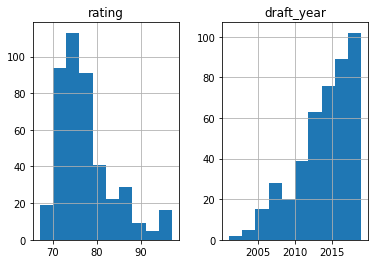

In [ ]:
#analisando o histograma das variáveis
df.hist()
plt.show();

In [ ]:
#checando duplicdade das linhas
df.duplicated().sum()

0

In [ ]:
#checando a duplicdade das colunas
df.T.duplicated().sum()

0

In [ ]:
#analisando os valores nulos do dataset por feature
df.isnull().sum().sort_values(ascending=False)

college        69
team           23
full_name       0
rating          0
jersey          0
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
version         0
dtype: int64

In [ ]:
#Limpando os dados da coluna height e inserindo em novas colunas

df[['height','height_cm']]=df['height'].str.split('/',expand=True)

In [ ]:
df['height_cm']

0       2.06
1       2.01
2       2.11
3       2.08
4       1.96
       ...  
434     2.08
435     2.08
436     2.01
437     1.88
438     2.13
Name: height_cm, Length: 439, dtype: object

In [ ]:
#Limpando os dados da coluna weight
df[['weight','weight_kg']]=df['weight'].str.split('/',expand=True)

In [ ]:
df[['weight_kg','weight_']]=df['weight_kg'].str.split('kg',expand=True)

In [ ]:
df['weight_kg']

0       113.4 
1       102.1 
2       109.8 
3       104.3 
4        99.8 
        ...   
434     104.3 
435     100.7 
436       103 
437      88.5 
438     113.4 
Name: weight_kg, Length: 439, dtype: object

In [ ]:
#Criando coluna age
df['b_day']=pd.to_datetime(df['b_day'])
df['b_year']=pd.DatetimeIndex(df['b_day']).year
df['b_year']
df['age']=datetime.today().year-df['b_year']
df['age']
#date.today()-str_to_date(df['b_day'])


0      38
1      31
2      28
3      34
4      33
       ..
434    34
435    29
436    23
437    32
438    28
Name: age, Length: 439, dtype: int64

In [ ]:
#Criando uma coluna cost_team com as categorias da coluna team em east e west
df['team'].unique()

array(['Los Angeles Lakers', 'Los Angeles Clippers', 'Milwaukee Bucks',
       'Brooklyn Nets', 'Houston Rockets', 'Golden State Warriors',
       'Portland Trail Blazers', 'Philadelphia 76ers', 'Denver Nuggets',
       'Minnesota Timberwolves', 'Miami Heat', 'Utah Jazz',
       'Detroit Pistons', 'Boston Celtics', 'Dallas Mavericks',
       'San Antonio Spurs', 'Washington Wizards', 'Indiana Pacers',
       'Toronto Raptors', 'Sacramento Kings', 'Phoenix Suns', nan,
       'Cleveland Cavaliers', 'New Orleans Pelicans', 'Orlando Magic',
       'Atlanta Hawks', 'Chicago Bulls', 'Oklahoma City Thunder',
       'New York Knicks', 'Memphis Grizzlies', 'Charlotte Hornets'],
      dtype=object)

In [ ]:
#criando um dataframe com as colunas e times

dados=[
           ['Milwaukee Bucks','east'],
       ['Brooklyn Nets','east'],
        ['Philadelphia 76ers','east'],
        ['Minnesota Timberwolves','east'],
           ['Miami Heat','east'],
        ['Utah Jazz','east'],
        ['Detroit Pistons','east'],
        ['Boston Celtics','east'],
        ['Washington Wizards','east'],
           ['Indiana Pacers','east'],
        ['Toronto Raptors','east'],
        ['Cleveland Cavaliers','east'],
        ['New Orleans Pelicans','east'],
           ['Orlando Magic','east'],
        ['Atlanta Hawks','east'],
        ['Chicago Bulls','east'],
        ['New York Knicks','east'],
        ['Charlotte Hornets','east'],
       ['Los Angeles Lakers','west'],
       ['Los Angeles Clippers','west'],
       ['Denver Nuggets','west'],
       ['Houston Rockets','west'],
       ['Golden State Warriors','west'],
           ['Golden State Warriors','west'],
       ['Portland Trail Blazers','west'],
       ['Dallas Mavericks','west'],
       ['San Antonio Spurs','west'],
       ['Sacramento Kings','west'],
       ['Phoenix Suns','west'],
       ['Oklahoma City Thunder','west'],
       ['Memphis Grizzlies','west'],
       ['nan','west']
]

frame=pd.DataFrame(data=dados,columns=['team','cost'])
frame

,team,cost
0,Milwaukee Bucks,east
1,Brooklyn Nets,east
2,Philadelphia 76ers,east
3,Minnesota Timberwolves,east
4,Miami Heat,east
5,Utah Jazz,east
6,Detroit Pistons,east
7,Boston Celtics,east
8,Washington Wizards,east
9,Indiana Pacers,east


In [ ]:
#fazendo um merge entre o frame e df

df=pd.merge(left=df, right=frame, on='team', how='left')


In [ ]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,...,draft_round,draft_peak,college,version,height_cm,weight_kg,weight_,b_year,age,cost
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9,250 lbs.,$37436858,USA,...,1,1,NaN,NBA2k20,2.06,113.4,.,1984,38,west
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7,225 lbs.,$32742000,USA,...,1,15,San Diego State,NBA2k20,2.01,102.1,.,1991,31,west
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11,242 lbs.,$25842697,Greece,...,1,15,NaN,NBA2k20,2.11,109.8,.,1994,28,east
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10,230 lbs.,$37199000,USA,...,1,2,Texas,NBA2k20,2.08,104.3,.,1988,34,east
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5,220 lbs.,$38199000,USA,...,1,3,Arizona State,NBA2k20,1.96,99.8,.,1989,33,west


In [ ]:
#verificando se existem colunas constantes

colunas=[]


for col in df.columns:
  if len(df[col].unique())==1:
    colunas.append(col)
  else:
    print(f'{col}, OK')

full_name, OK
rating, OK
jersey, OK
team, OK
position, OK
b_day, OK
height, OK
weight, OK
salary, OK
country, OK
draft_year, OK
draft_round, OK
draft_peak, OK
college, OK
version, OK
height_cm, OK
weight_kg, OK
b_year, OK
age, OK
cost, OK


In [ ]:
print(colunas)

['weight_']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    449 non-null    object        
 1   rating       449 non-null    int64         
 2   jersey       449 non-null    object        
 3   team         426 non-null    object        
 4   position     449 non-null    object        
 5   b_day        449 non-null    datetime64[ns]
 6   height       449 non-null    object        
 7   weight       449 non-null    object        
 8   salary       449 non-null    object        
 9   country      449 non-null    object        
 10  draft_year   449 non-null    int64         
 11  draft_round  449 non-null    object        
 12  draft_peak   449 non-null    object        
 13  college      379 non-null    object        
 14  version      449 non-null    object        
 15  height_cm    449 non-null    object        
 16  weight_k

In [ ]:
#dropando as colunas que não serão utilizadas
#Estas colunas não serão utilizadas pois,algumas devem ter um melhor tratamento, exemplo df['college'] a qual necessita ser substituida 
#inserindo as regiões do colégio

df.drop(columns=['jersey','b_day','country','draft_year','college','version','b_year','weight','height','weight_'],inplace=True)

In [ ]:
df.head()

,full_name,rating,team,position,salary,draft_round,draft_peak,height_cm,weight_kg,age,cost
0,LeBron James,97,Los Angeles Lakers,F,$37436858,1,1,2.06,113.4,38,west
1,Kawhi Leonard,97,Los Angeles Clippers,F,$32742000,1,15,2.01,102.1,31,west
2,Giannis Antetokounmpo,96,Milwaukee Bucks,F-G,$25842697,1,15,2.11,109.8,28,east
3,Kevin Durant,96,Brooklyn Nets,F,$37199000,1,2,2.08,104.3,34,east
4,James Harden,96,Houston Rockets,G,$38199000,1,3,1.96,99.8,33,west


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    449 non-null    object
 1   rating       449 non-null    int64 
 2   team         426 non-null    object
 3   position     449 non-null    object
 4   salary       449 non-null    object
 5   draft_round  449 non-null    object
 6   draft_peak   449 non-null    object
 7   height_cm    449 non-null    object
 8   weight_kg    449 non-null    object
 9   age          449 non-null    int64 
 10  cost         426 non-null    object
dtypes: int64(2), object(9)
memory usage: 42.1+ KB


In [ ]:
#preenchendo os valores faltantes de cost com a moda, pois esta feature possui apenas 2 categorias

#df['cost']
df['cost']=df['cost'].fillna(df['cost'].mode()[0])

In [ ]:
df['cost'].isnull().sum()

0

In [ ]:
df.head()

,full_name,rating,team,position,salary,draft_round,draft_peak,height_cm,weight_kg,age,cost
0,LeBron James,97,Los Angeles Lakers,F,$37436858,1,1,2.06,113.4,38,west
1,Kawhi Leonard,97,Los Angeles Clippers,F,$32742000,1,15,2.01,102.1,31,west
2,Giannis Antetokounmpo,96,Milwaukee Bucks,F-G,$25842697,1,15,2.11,109.8,28,east
3,Kevin Durant,96,Brooklyn Nets,F,$37199000,1,2,2.08,104.3,34,east
4,James Harden,96,Houston Rockets,G,$38199000,1,3,1.96,99.8,33,west


In [ ]:
#inserindo a categoira no_team na feature team, para os players que não possuem equipe


df['team']=df['team'].fillna('no_team')

In [ ]:
df['team'].unique()

array(['Los Angeles Lakers', 'Los Angeles Clippers', 'Milwaukee Bucks',
       'Brooklyn Nets', 'Houston Rockets', 'Golden State Warriors',
       'Portland Trail Blazers', 'Philadelphia 76ers', 'Denver Nuggets',
       'Minnesota Timberwolves', 'Miami Heat', 'Utah Jazz',
       'Detroit Pistons', 'Boston Celtics', 'Dallas Mavericks',
       'San Antonio Spurs', 'Washington Wizards', 'Indiana Pacers',
       'Toronto Raptors', 'Sacramento Kings', 'Phoenix Suns', 'no_team',
       'Cleveland Cavaliers', 'New Orleans Pelicans', 'Orlando Magic',
       'Atlanta Hawks', 'Chicago Bulls', 'Oklahoma City Thunder',
       'New York Knicks', 'Memphis Grizzlies', 'Charlotte Hornets'],
      dtype=object)

In [ ]:
#substituindo as categorias undrafted da colunas draft_round e draft_peak


df['draft_round'].replace(['1','2','Undrafted'],['1','2','3'],inplace=True)


print(df['draft_round'].value_counts())


1    273
2    109
3     67
Name: draft_round, dtype: int64


In [ ]:
df['draft_peak'].unique()

array(['1', '15', '2', '3', '7', '10', '6', '41', '4', '11', '30', '27',
       '13', '9', '5', '35', '17', '16', '18', '25', '19', '24', '39',
       '45', '31', '36', '32', '48', '12', '38', '47', '8', '33',
       'Undrafted', '40', '14', '22', '42', '46', '20', '29', '26', '51',
       '43', '34', '21', '23', '60', '44', '28', '37', '55', '49', '50',
       '52', '54', '58'], dtype=object)

In [ ]:
  #transformando Undrafted para 0  
  df.loc[df['draft_peak']=='Undrafted',['draft_peak']]=0

In [ ]:
#modificando a coluna salary
df['salary']

0      $37436858
1      $32742000
2      $25842697
3      $37199000
4      $38199000
         ...    
444    $40918900
445    $35361360
446    $10174391
447    $39344900
448    $31579390
Name: salary, Length: 449, dtype: object

In [ ]:
df[['salary','salary_']]=df['salary'].str.split('$',expand=True)

In [ ]:
df['salary_']

0      37436858
1      32742000
2      25842697
3      37199000
4      38199000
         ...   
444    40918900
445    35361360
446    10174391
447    39344900
448    31579390
Name: salary_, Length: 449, dtype: object

In [ ]:
df.drop(columns=['salary'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    449 non-null    object
 1   rating       449 non-null    int64 
 2   team         449 non-null    object
 3   position     449 non-null    object
 4   draft_round  449 non-null    object
 5   draft_peak   449 non-null    object
 6   height_cm    449 non-null    object
 7   weight_kg    449 non-null    object
 8   age          449 non-null    int64 
 9   cost         449 non-null    object
 10  salary_      449 non-null    object
dtypes: int64(2), object(9)
memory usage: 42.1+ KB


In [ ]:
# as colunas abaixo foram deixadas pois, possuem poucos valores, no caso de dados categóricos
#A feature full_name e team será deixada por enquanto, para a realização da etapa de EDA, depois elas serão retiradas

#3 - EDA (Exploratory Data Analysis)

In [ ]:
#convertendo as colunas numericas que estão como object para numeric, a fim de facilitar as análises estatísticas

colunas=['draft_round','draft_peak','height_cm','weight_kg','salary_']



for i in colunas:
  df[i] = pd.to_numeric(df[i],errors = 'coerce')
 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_name    449 non-null    object 
 1   rating       449 non-null    int64  
 2   team         449 non-null    object 
 3   position     449 non-null    object 
 4   draft_round  449 non-null    int64  
 5   draft_peak   449 non-null    int64  
 6   height_cm    449 non-null    float64
 7   weight_kg    449 non-null    float64
 8   age          449 non-null    int64  
 9   cost         449 non-null    object 
 10  salary_      449 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 42.1+ KB


##Análises descritivas

In [ ]:
#Quantidade de jogadores
df['full_name'].nunique()

429

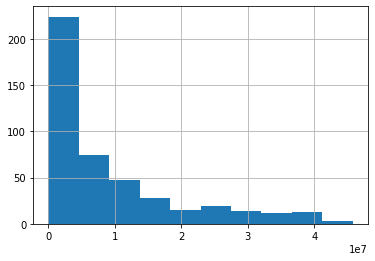

In [ ]:
#analisando  o histograma para salary
df['salary_'].hist()
plt.show();

In [ ]:
#Verificando o time com maior média salarial
df[['team','salary_']].groupby(['team']).mean().sort_values(by=['salary_'],ascending=False)

# O GSW é o time com maior média seguido pelo Brooklyn Nets

,salary_
team,
Golden State Warriors,1.749070e+07
Brooklyn Nets,1.387991e+07
Portland Trail Blazers,1.287674e+07
Los Angeles Clippers,1.267878e+07
Los Angeles Lakers,1.203409e+07
Philadelphia 76ers,1.070640e+07
Miami Heat,1.043835e+07
Houston Rockets,1.031747e+07
Oklahoma City Thunder,1.002175e+07


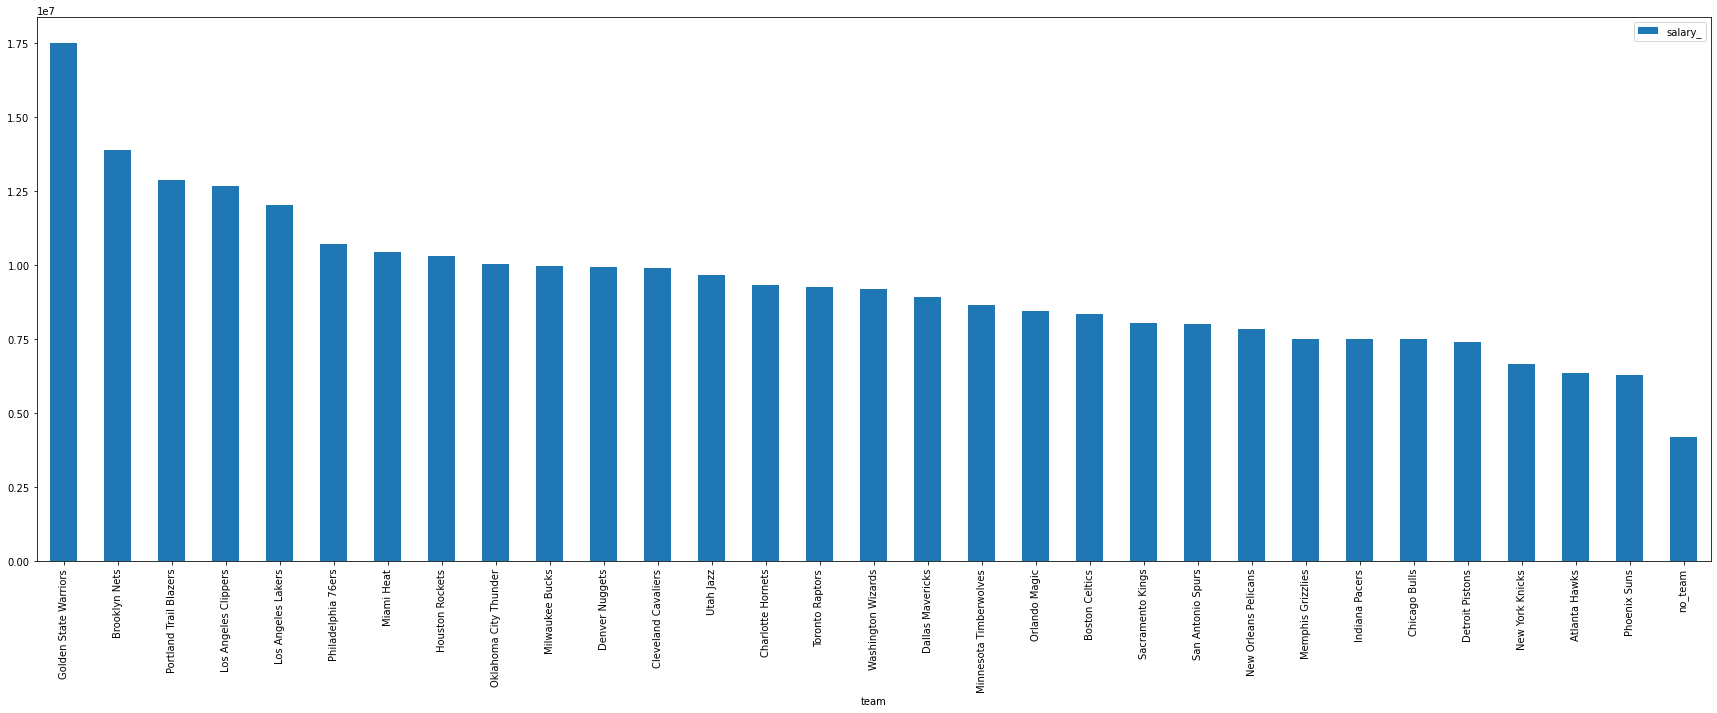

In [ ]:
#verificando graficamente o salário por equipe
from IPython.core.pylabtools import figsize

df[['team','salary_']].groupby(['team']).mean().sort_values(by=['salary_'],ascending=False).plot(figsize(30,10),kind='bar');

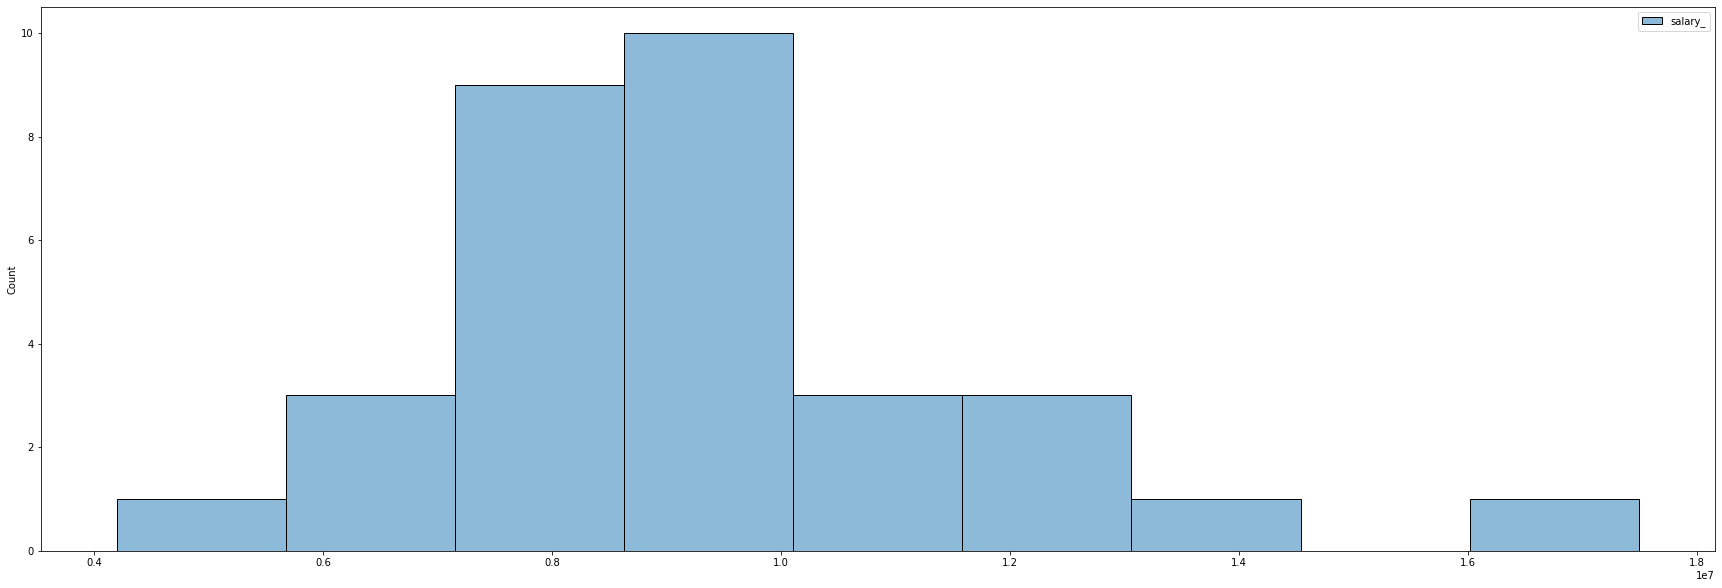

In [ ]:
#verificando o histograa para salary
sns.histplot(df[['team','salary_']].groupby(['team']).mean());

In [ ]:
#Verificando os players com maior média salarial
df[['full_name','salary_']].groupby(['full_name']).mean().sort_values(by=['salary_'],ascending=False)

# Os jogadores os maiores salários são o Stephen Curry e James Harden

,salary_
full_name,
Stephen Curry,43006362.0
James Harden,41254920.0
LeBron James,39308701.0
Kevin Durant,39058950.0
Russell Westbrook,38506482.0
...,...
Kostas Antetokounmpo,79568.0
Cam Reynolds,79568.0
Michael Frazier,79568.0


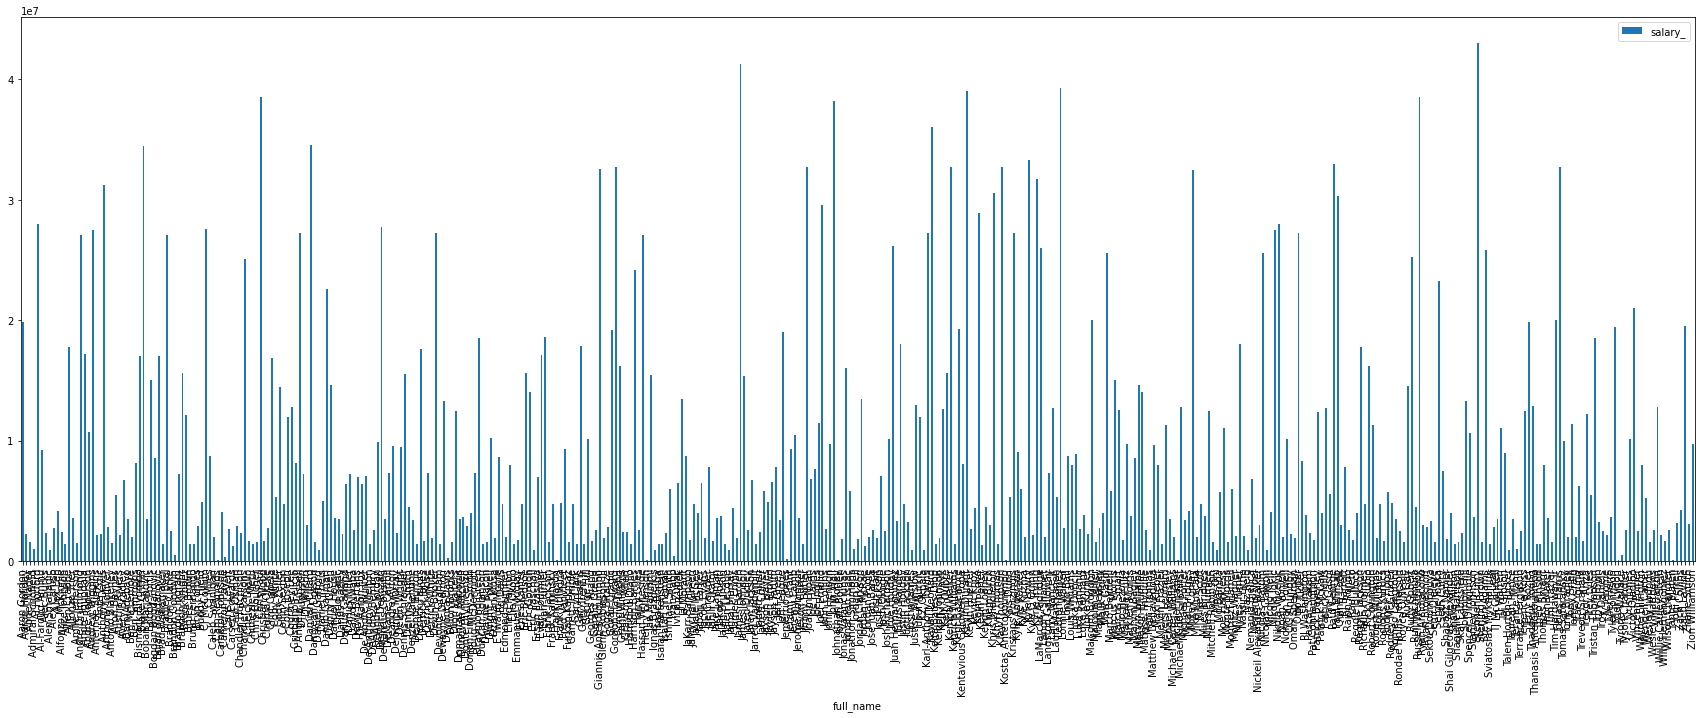

In [ ]:
#verificando graficamente
df[['full_name','salary_']].groupby(['full_name']).mean().plot(figsize(30,10),kind='bar');

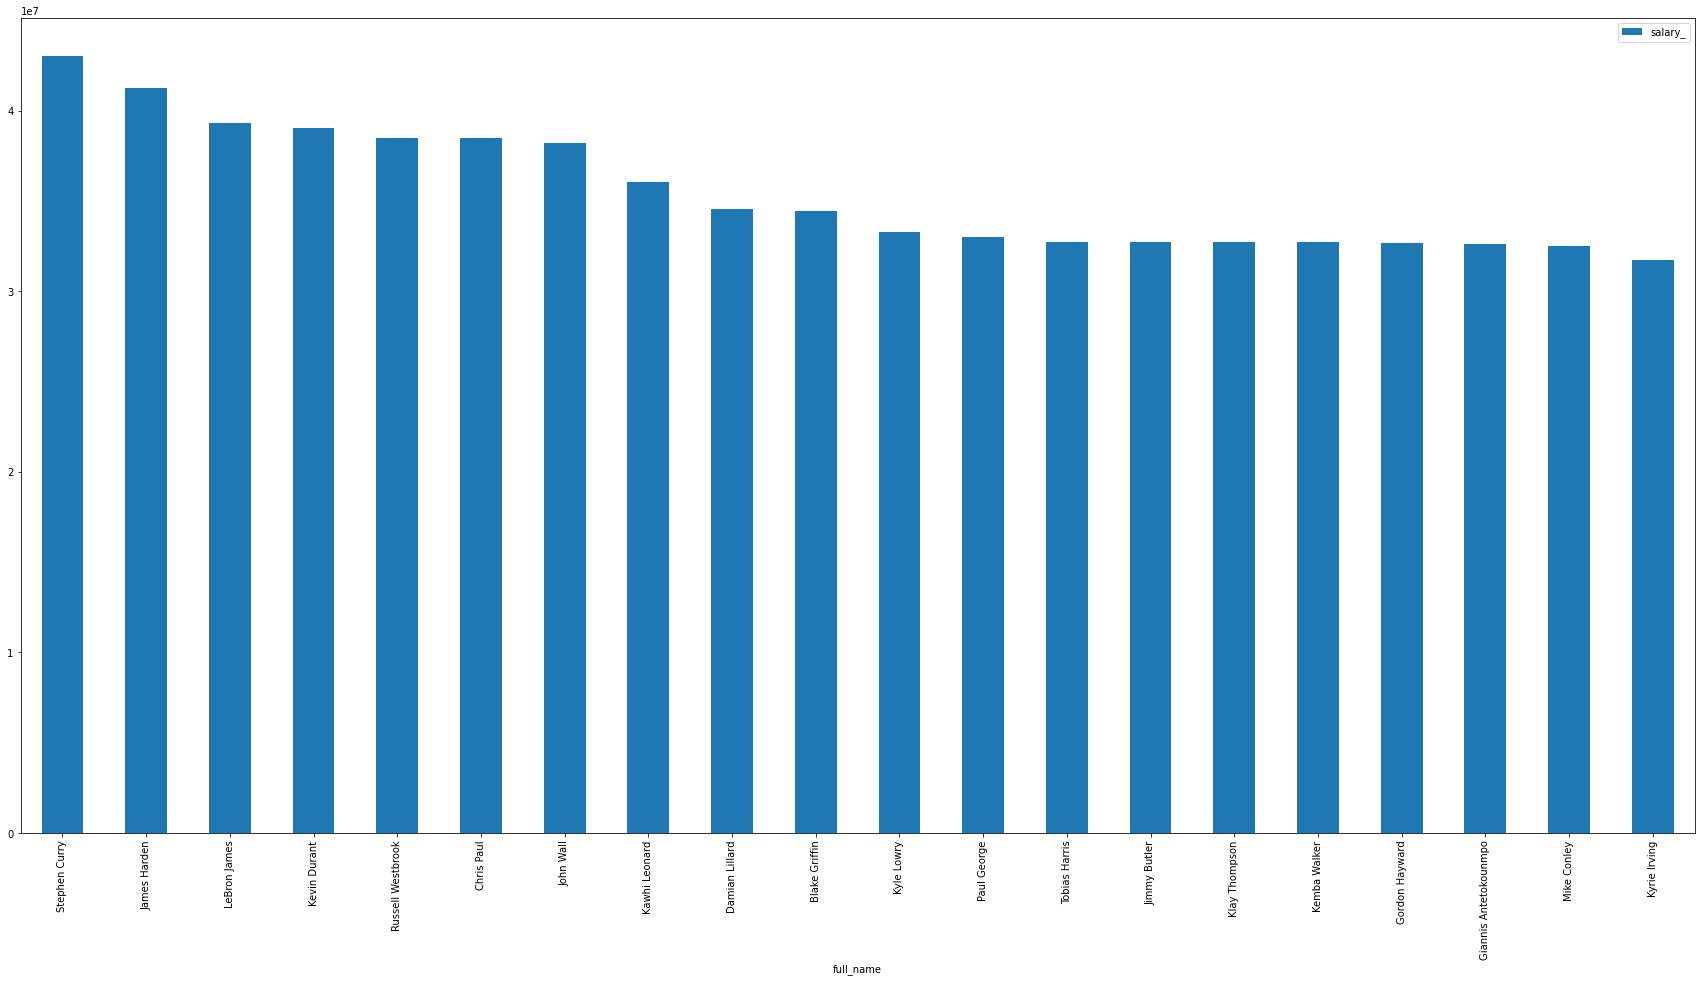

In [ ]:
#Verificando graficamente os top 20 players da etapa anterior

df.groupby('full_name').mean()[['salary_']].sort_values(by=['salary_'],ascending=False)[0:20].plot(figsize(30,15),kind='bar')

In [ ]:
#criando um dataset auxiliar para verificar a correlação entre cost e as outras features, sem que team e o fullname deixem os gráficos poluídos devido
#a quantidade de categorias unicas para fullname e team
df2=df.drop(columns=['full_name','team'])

In [ ]:
#criando uma coluna para avaliar se o salary é acima ou abaixo da média, se true acima, false, abaixo
round(df['salary_'].mean(),2)

9357800.77

In [ ]:
df['salary_mean_above']=df['salary_']>df['salary_'].mean()
df['salary_mean_above']

0      True
1      True
2      True
3      True
4      True
       ... 
444    True
445    True
446    True
447    True
448    True
Name: salary_mean_above, Length: 449, dtype: bool

In [ ]:
df['salary_']

0      37436858
1      32742000
2      25842697
3      37199000
4      38199000
         ...   
444    40918900
445    35361360
446    10174391
447    39344900
448    31579390
Name: salary_, Length: 449, dtype: int64

In [ ]:
#fazendo o mesmo para o dataset auxiliar
df2['salary_mean_above']=df2['salary_']>df2['salary_'].mean()
df2['salary_mean_above']

0      True
1      True
2      True
3      True
4      True
       ... 
444    True
445    True
446    True
447    True
448    True
Name: salary_mean_above, Length: 449, dtype: bool

In [ ]:
df['salary_mean_above'] = df['salary_mean_above'].astype('object')

In [ ]:
df2['salary_mean_above'] = df2['salary_mean_above'].astype('object')

In [ ]:
df2['salary_mean_above'].value_counts()

False    301
True     148
Name: salary_mean_above, dtype: int64

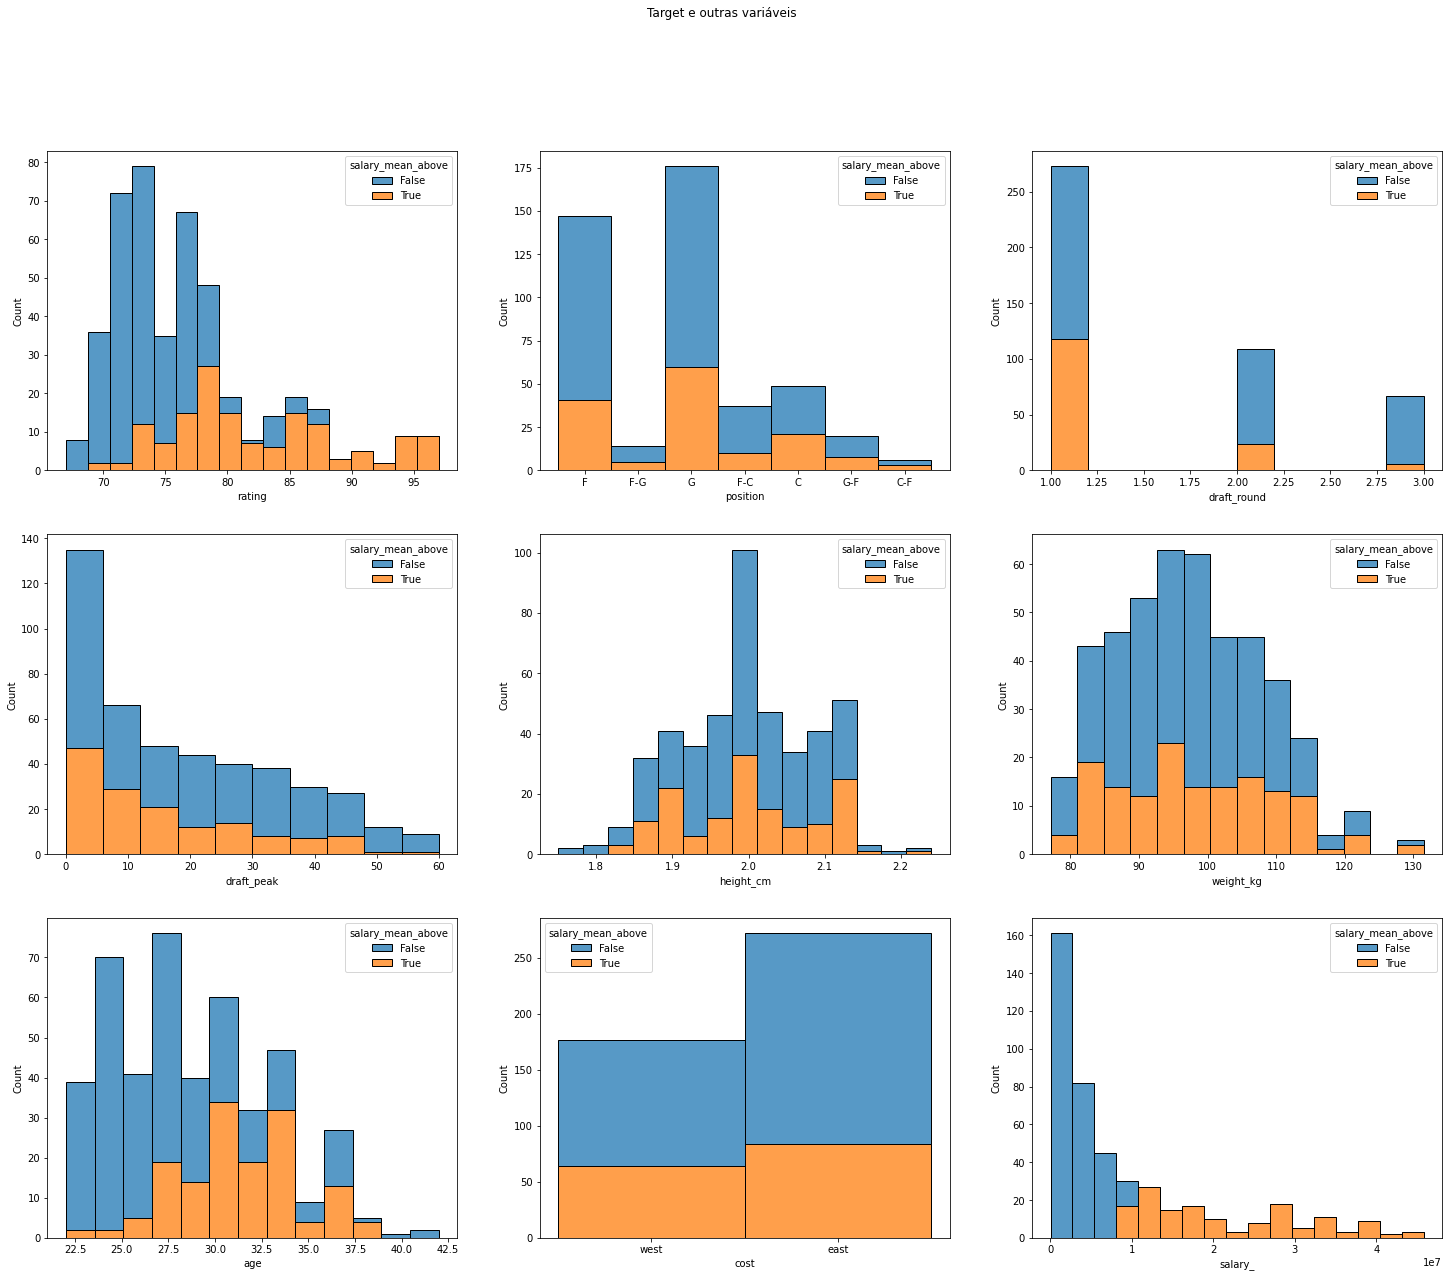

In [ ]:
#verificanco a relação do salary com as outras features

columns = df2.columns
fig, axes = plt.subplots(3, 3, figsize=(25, 20),sharey=False)
fig.suptitle('Target e outras variáveis')

feature=0
for row in range(0,3):
    for col in range(0,3):
        sns.histplot(ax=axes[row, col], data=df2, x=columns[feature], hue="salary_mean_above", multiple="stack")
        feature += 1

In [ ]:
# percebe-se que:
#1-A maioria dos jogadores possuem salarío abaixo da média
#2-quanto maior o rating maior será o salário do jogador
#3-quanto maior for o draft peak mais haverão jogadores que ganham salário abaixo da média
#4-jogadores com menos idade são aqueles que possuem os menores salários
#5-Não existe diferença de salários por posição

##Teste de hipóteses

In [ ]:
#analisando a hipotése 1 
#A maioria dos jogadores possuem salário abaixo da média

#Separando os jogadores que estão abaixo da média

df['salary_mean_above'].value_counts()


False    301
True     148
Name: salary_mean_above, dtype: int64

In [ ]:
#Média de salários para os jogadores que ganham acima da média
df.loc[df['salary_mean_above']==True,['salary_']].mean()

salary_    2.157466e+07
dtype: float64

In [ ]:
#Média de salários para os jogadores que ganham abaixo da média
df.loc[df['salary_mean_above']==False,['salary_']].mean()

salary_    3.350838e+06
dtype: float64

In [ ]:
#verificando se salário possue distribuição normal
#aplicando o teste de normalidade de shapiro-wilks onde h0 - a distribuição é normal
#considerando um alpha de 5%

stats.shapiro(df['salary_'])

# como o p_value é menor que o alpha, considera-se que os dados estão em região crítica, desta forma, a hipótese nule é rejeitada

ShapiroResult(statistic=0.7772796154022217, pvalue=2.9357612415676472e-24)

In [ ]:
#Verificando se é possível normalizar a variável, e desta forma, utilizar um teste de hipotese paramétrico
#Utilizando a noormalização por boxcox

df['salary_boxcox'],_=stats.boxcox(df['salary_'])


In [ ]:
stats.shapiro(df['salary_boxcox'])
#mesmo após utilizar boxcox verifica-se que os dados não são normais

ShapiroResult(statistic=0.9689975380897522, pvalue=3.785468649653012e-08)

In [ ]:
#Aplicando o teste estatístico não paramétrico para verificar se os grupos são diferentes
#aplicando o teste de Mann Whitney, onde:
#a hipótese h0 é que a distribuição x e y são as mesmas
#rejeita-se h0 para um p-value menor que alpha de 5%

x=df.loc[df['salary_mean_above']==True,['salary_']]
y=df.loc[df['salary_mean_above']==False,['salary_']]

w,p=scipy.stats.mannwhitneyu(x,y)

print(w,p)


[44548.] [1.4698817e-66]


In [ ]:
#verifica-se que estatisticamente os grupso são diferentes e as médias salariais de 2 grupos diferentes são diferentes, assim:
#A hipótese 1,a maioria dos jogadores possuem salário abaixo da média, é verdadeira

In [ ]:
#2-quanto maior o rating maior será o salário do jogador

In [ ]:
#verificando as classificações do rating
df['rating'].unique()

array([97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81,
       80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67])

In [ ]:
#como o rating é uma variavel categorica ordinal faz se necessário a utilização de quartis para separá-los

q_qtl=[0.25,0.5,0.75]

for n in q_qtl:
  np.quantile(df['rating'],q=n)
  print(np.quantile(df['rating'],q=n))

72.0
75.0
79.0


In [ ]:
#criando uma coluna rating_qtl para separar o rating nestes quartis
df['rating_qtl']=0

In [ ]:
#separando o rating nos quartis 
df.loc[df['rating']<=72,['rating_qtl']]='qtl1'
df.loc[df['rating']>=79,['rating_qtl']]='qtl3'

In [ ]:
df.loc[df['rating_qtl']==0,['rating_qtl']]='qtl2'

In [ ]:
df['rating_qtl'].unique()

array(['qtl3', 'qtl2', 'qtl1'], dtype=object)

In [ ]:
#verificando a média salarial para cada quartil
var=['qtl1','qtl2','qtl3']

for i in var:
  z=df.loc[df['rating_qtl']==i,['salary_']].mean()
  print(f'======== {i} =========')
  print(z)

======== qtl1 =========
salary_    2.270853e+06
dtype: float64
======== qtl2 =========
salary_    6.451208e+06
dtype: float64
======== qtl3 =========
salary_    2.054555e+07
dtype: float64


In [ ]:
#verificou se que as médias dos salários para cada quartil são diferentes e o quartil 3 possui a maior média salarial
#Necessário verificar se estes grupos são estatisticaente diferentes

In [ ]:
#aplicando o teste de Mann Whitney para os quartis do rating por salário
#a hipótese h0 é que a distribuição x e y são as mesmas
#rejeita-se h0 para um p-value menor que alpha de 5%

qtl=['qtl1','qtl2','qtl3']


for i in qtl:
  for j in qtl:
    if i!=j:
      cor,p=scipy.stats.mannwhitneyu(df.loc[df['rating_qtl']==i,['salary_']],df.loc[df['rating_qtl']==j,['salary_']])
      print(f'==========={i,j}=============')
      print(f'{cor}, p-value:{p}')

===========('qtl1', 'qtl2')=============
[3791.], p-value:[2.63851765e-24]
===========('qtl1', 'qtl3')=============
[486.5], p-value:[2.98095448e-36]
===========('qtl2', 'qtl1')=============
[20105.], p-value:[2.63851765e-24]
===========('qtl2', 'qtl3')=============
[3937.], p-value:[8.62705067e-27]
===========('qtl3', 'qtl1')=============
[14245.5], p-value:[2.98095448e-36]
===========('qtl3', 'qtl2')=============
[22225.], p-value:[8.62705067e-27]


In [ ]:
#como p-value para todos os qurtis é menor que alpha (5%)
#conclui-se que os quartis são diferentes
#desta forma, a média é diferente para cada grupo
#Como o quartil 3 é do rating 79 e este possui a maior média salarial, e estes quairtis são diferentes, conclui-se que a hipótese:
#2-quanto maior o rating maior será o salário do jogador, é verdadeira

In [ ]:
#3-quanto maior for o draft peak mais haverão jogadores que ganham salário abaixo da média

In [ ]:
df['draft_peak'].unique()

array([ 1, 15,  2,  3,  7, 10,  6, 41,  4, 11, 30, 27, 13,  9,  5, 35, 17,
       16, 18, 25, 19, 24, 39, 45, 31, 36, 32, 48, 12, 38, 47,  8, 33,  0,
       40, 14, 22, 42, 46, 20, 29, 26, 51, 43, 34, 21, 23, 60, 44, 28, 37,
       55, 49, 50, 52, 54, 58])

In [ ]:
df['draft_peak'].value_counts()

0     67
2     16
1     15
3     15
7     14
9     13
15    11
5     11
4     11
11    11
12    10
6     10
24     9
10     9
8      9
23     8
35     8
18     8
19     8
14     8
13     8
27     7
28     7
26     7
20     7
46     7
22     7
40     7
30     7
31     7
38     6
33     6
21     6
16     6
25     5
41     5
17     5
29     5
39     5
42     5
45     5
32     5
47     5
34     5
36     4
48     3
50     3
37     3
51     3
60     3
43     3
58     3
44     2
55     2
49     2
52     1
54     1
Name: draft_peak, dtype: int64

In [ ]:
#criando uma coluna draf_quantile para separar o draft_peak nestes quartis

q_qtl=[0.25,0.5,0.75]

for n in q_qtl:
  np.quantile(df['draft_peak'],q=n)
  print(np.quantile(df['draft_peak'],q=n))


3.0
14.0
30.0


In [ ]:
df['draft_peak_qtl']=0

In [ ]:
  #inserindo a classificação dos quartis na coluna draft_peak_qtl
  df.loc[df['draft_peak']<=3,['draft_peak_qtl']]='qtl1'

In [ ]:
  df.loc[df['draft_peak']>=30,['draft_peak_qtl']]='qtl3'

In [ ]:
  df.loc[df['draft_peak_qtl']==0,['draft_peak_qtl']]='qtl2'

In [ ]:
df['draft_peak_qtl'].unique()

array(['qtl1', 'qtl2', 'qtl3'], dtype=object)

In [ ]:
#verificando a quantidade de jogadores que possuem salário abaixo da média por quartil

In [ ]:
df['salary_mean_above'].value_counts()

False    301
True     148
Name: salary_mean_above, dtype: int64

In [ ]:
var=['qtl1','qtl2','qtl3']

for i in var:
  z=df.loc[df['salary_mean_above']==False,['draft_peak_qtl']].value_counts()
print(z)

draft_peak_qtl
qtl2              133
qtl3               91
qtl1               77
dtype: int64


In [ ]:
#verifica-se que o quartil 2 possui mais jogadores com sálario abaixo da média

In [ ]:
#aplicando o teste de Mann Whitney para os quartis do draft_peak por salário
#a hipótese h0 é que a distribuição x e y são as mesmas
#rejeita-se h0 para um p-value menor que alpha de 5%

qtl=['qtl1','qtl2','qtl3']


for i in qtl:
  for j in qtl:
    if i!=j:
      cor,p=scipy.stats.mannwhitneyu(df.loc[df['draft_peak_qtl']==i,['salary_']],df.loc[df['draft_peak_qtl']==j,['salary_']])
      print(f'==========={i,j}=============')
      print(f'{cor}, p-value:{p}')

===========('qtl1', 'qtl2')=============
[11102.], p-value:[0.11050824]
===========('qtl1', 'qtl3')=============
[8402.], p-value:[0.00022623]
===========('qtl2', 'qtl1')=============
[13758.], p-value:[0.11050824]
===========('qtl2', 'qtl3')=============
[18368.5], p-value:[3.47231437e-11]
===========('qtl3', 'qtl1')=============
[4706.], p-value:[0.00022623]
===========('qtl3', 'qtl2')=============
[7151.5], p-value:[3.47231437e-11]


In [ ]:
#verifica-se que os quartis 1 e 2 não são diferentes, pois o p-value é maior que 5%, validando a hipótese h0
#Já os quartis 1 e 3 e 2, 3 são diferentes

In [ ]:
#Verifica-se que os quartis 1 e 2 em termos de salário, não são diferentes, mas ambos são diferentes para o quartil 3
#Este por sua vez, possui menos jogadores co salário abaixo da média que o quartil 2, desta forma, conclui-se que:
#A hipótese, 3, quanto maior for o draft peak mais haverão jogadores que ganham salário abaixo da média, é falsa

In [ ]:
#4-jogadores com menos idade são aqueles que possuem os menores salários

In [ ]:
df['age'].unique()

array([38, 31, 28, 34, 33, 29, 32, 30, 27, 26, 23, 37, 35, 25, 24, 36, 22,
       42, 41, 40])

In [ ]:
round(df['age'].mean(),0)

29.0

In [ ]:
#criando uma coluna age_above para separar as idades abaixo da média
df['age_above']=0

In [ ]:
df['age_above']=df['age']>df['age'].mean()
df['age_above']

0       True
1       True
2      False
3       True
4       True
       ...  
444     True
445     True
446    False
447     True
448    False
Name: age_above, Length: 449, dtype: bool

In [ ]:
df.loc[df['age_above']==True,['salary_']].mean()

salary_    1.376140e+07
dtype: float64

In [ ]:
df.loc[df['age_above']==False,['salary_']].mean()

salary_    5.012656e+06
dtype: float64

In [ ]:
#A hipótese h0 é que a distribuição x e y são as mesmas
#rejeita-se h0 para um p-value menor que alpha de 5%

x=df.loc[df['age_above']==True,['salary_']]
y=df.loc[df['age_above']==False,['salary_']]

w,p=scipy.stats.mannwhitneyu(x,y)

print(w,p)

[39439.5] [3.8062707e-25]


In [ ]:
#verifica-se que existe diferença nos salários dos jogadores que possuem idade acima e abaixo da média
# como a média dos jogadores com idade abaixo da média é mais baixa, verifica-se que:
# A hipótese 4,jogadores com menos idade são aqueles que possuem os menores salários, é verdadeira

In [ ]:
#5-Não existe diferença de salários por posição

df['position'].unique()

array(['F', 'F-G', 'G', 'F-C', 'C', 'G-F', 'C-F'], dtype=object)

In [ ]:
#aplicando o teste de Mann Whitney para os quartis do draft_peak por salário
#a hipótese h0 é que a distribuição x e y são as mesmas
#rejeita-se h0 para um p-value menor que alpha de 5%

var=['F', 'F-G', 'G', 'F-C', 'C', 'G-F', 'C-F']


for i in var:
  for j in var:
    if i!=j:
      cor,p=scipy.stats.mannwhitneyu(df.loc[df['position']==i,['salary_']],df.loc[df['position']==j,['salary_']])
      print(f'==========={i,j}=============')
      print(f'{cor}, p-value:{p}')

===========('F', 'F-G')=============
[908.], p-value:[0.46966958]
===========('F', 'G')=============
[12455.], p-value:[0.56530365]
===========('F', 'F-C')=============
[2966.], p-value:[0.39553871]
===========('F', 'C')=============
[3015.5], p-value:[0.08859632]
===========('F', 'G-F')=============
[1443.5], p-value:[0.89801328]
===========('F', 'C-F')=============
[368.], p-value:[0.49553011]
===========('F-G', 'F')=============
[1150.], p-value:[0.46966958]
===========('F-G', 'G')=============
[1355.], p-value:[0.53613399]
===========('F-G', 'F-C')=============
[311.], p-value:[0.27700226]
===========('F-G', 'C')=============
[325.], p-value:[0.77230821]
===========('F-G', 'G-F')=============
[153.], p-value:[0.66179061]
===========('F-G', 'C-F')=============
[42.], p-value:[1.]
===========('G', 'F')=============
[13417.], p-value:[0.56530365]
===========('G', 'F-G')=============
[1109.], p-value:[0.53613399]
===========('G', 'F-C')=============
[3645.], p-value:[0.25420486]
======

In [ ]:
#Verifica-se que não existe diferença estatística salarial entre as posições, assim:
#A hipótese, 5, não existe diferença de salários por posição, é verdadeira

In [ ]:
# Conclujise que:
#1-A maioria dos jogadores possuem salarío abaixo da média - Verdadeiro
#2-quanto maior o rating maior será o salário do jogador - Veradeiro
#3-quanto maior for o draft peak mais haverão jogadores que ganham salário abaixo da média - Falsa
#4-jogadores com menos idade são aqueles que possuem os menores salários - Veradeiro
#5-Não existe diferença de salários por posição - Verdadeiro


##Correlação entre as variáveis

In [ ]:
#analisando a correlação entre as variáveis
# Verificando o p-value para a correlação entre as variáveis target e preditoras
#Foi utilizado spearman, pois não se sabe se a variável salary é normal, assim como as outras features
# A hipótese nula para Spearman é que não existe correlação entre as variáveis
correlations=[]
target=df['salary_']
predictors=df.drop(columns=['salary_','full_name','team','position','cost','salary_mean_above','salary_boxcox','age_above'])

for col in predictors:
  cor,p=scipy.stats.spearmanr(predictors[col],target)
  if p<0.05:
        print(f'p-value:{p}, correlacao:{cor}')
        print(f'Existe correlação entre {col} e salary')
        print('---'*15)
        correlations.append(col)
  else:
        print(f'p-value:{p}, correlacao:{cor}')
        print(f'Não existe correlação entre {col} e salary')
        print('---'*15)


p-value:1.0175658957288293e-95, correlacao:0.7867886323782576
Existe correlação entre rating e salary
---------------------------------------------
p-value:4.708858024693932e-21, correlacao:-0.42435363659839714
Existe correlação entre draft_round e salary
---------------------------------------------
p-value:4.46198569438951e-06, correlacao:-0.2146198551390189
Existe correlação entre draft_peak e salary
---------------------------------------------
p-value:0.1806718503194681, correlacao:0.06328972445513785
Não existe correlação entre height_cm e salary
---------------------------------------------
p-value:0.2679909243134592, correlacao:0.05238577422782701
Não existe correlação entre weight_kg e salary
---------------------------------------------
p-value:1.2432138477344913e-29, correlacao:0.4988954231611299
Existe correlação entre age e salary
---------------------------------------------
p-value:1.060653200815073e-74, correlacao:0.7260168691413171
Existe correlação entre rating_qtl e 

In [ ]:
#ordenando as correlações
df.corr(method='spearman')['salary_'].sort_values(ascending=False)

salary_          1.000000
salary_boxcox    1.000000
rating           0.786789
age              0.498895
age_above        0.489437
height_cm        0.063290
weight_kg        0.052386
draft_peak      -0.214620
draft_round     -0.424354
Name: salary_, dtype: float64

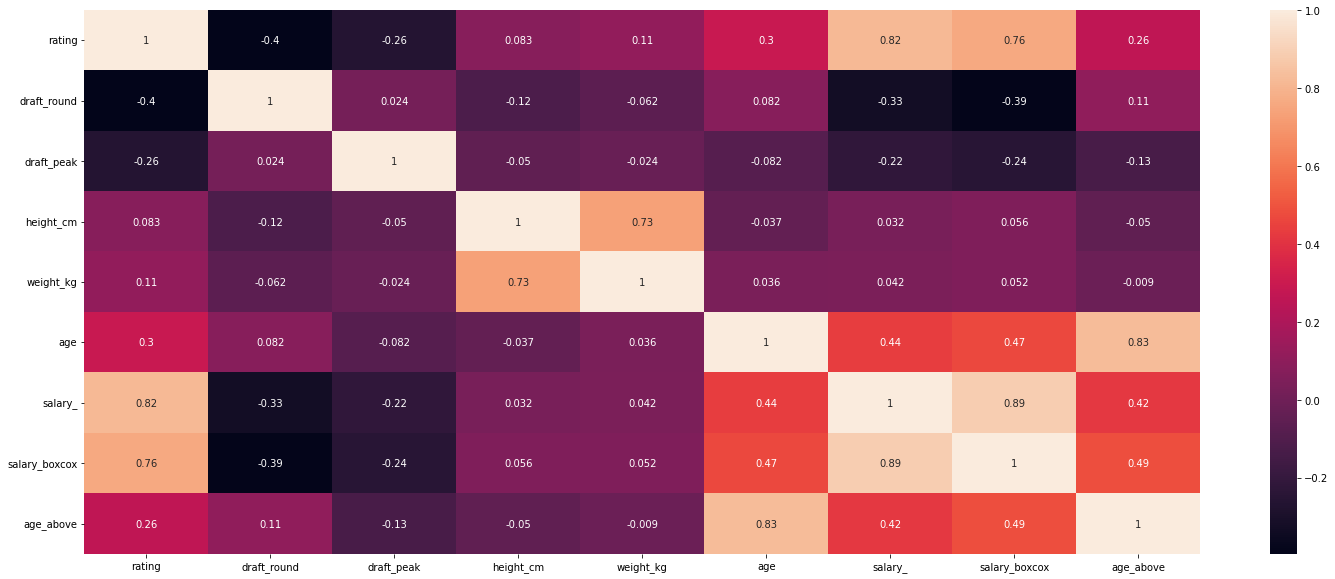

In [ ]:
# analisando a correlação pelo heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Figure size 1440x720 with 0 Axes>

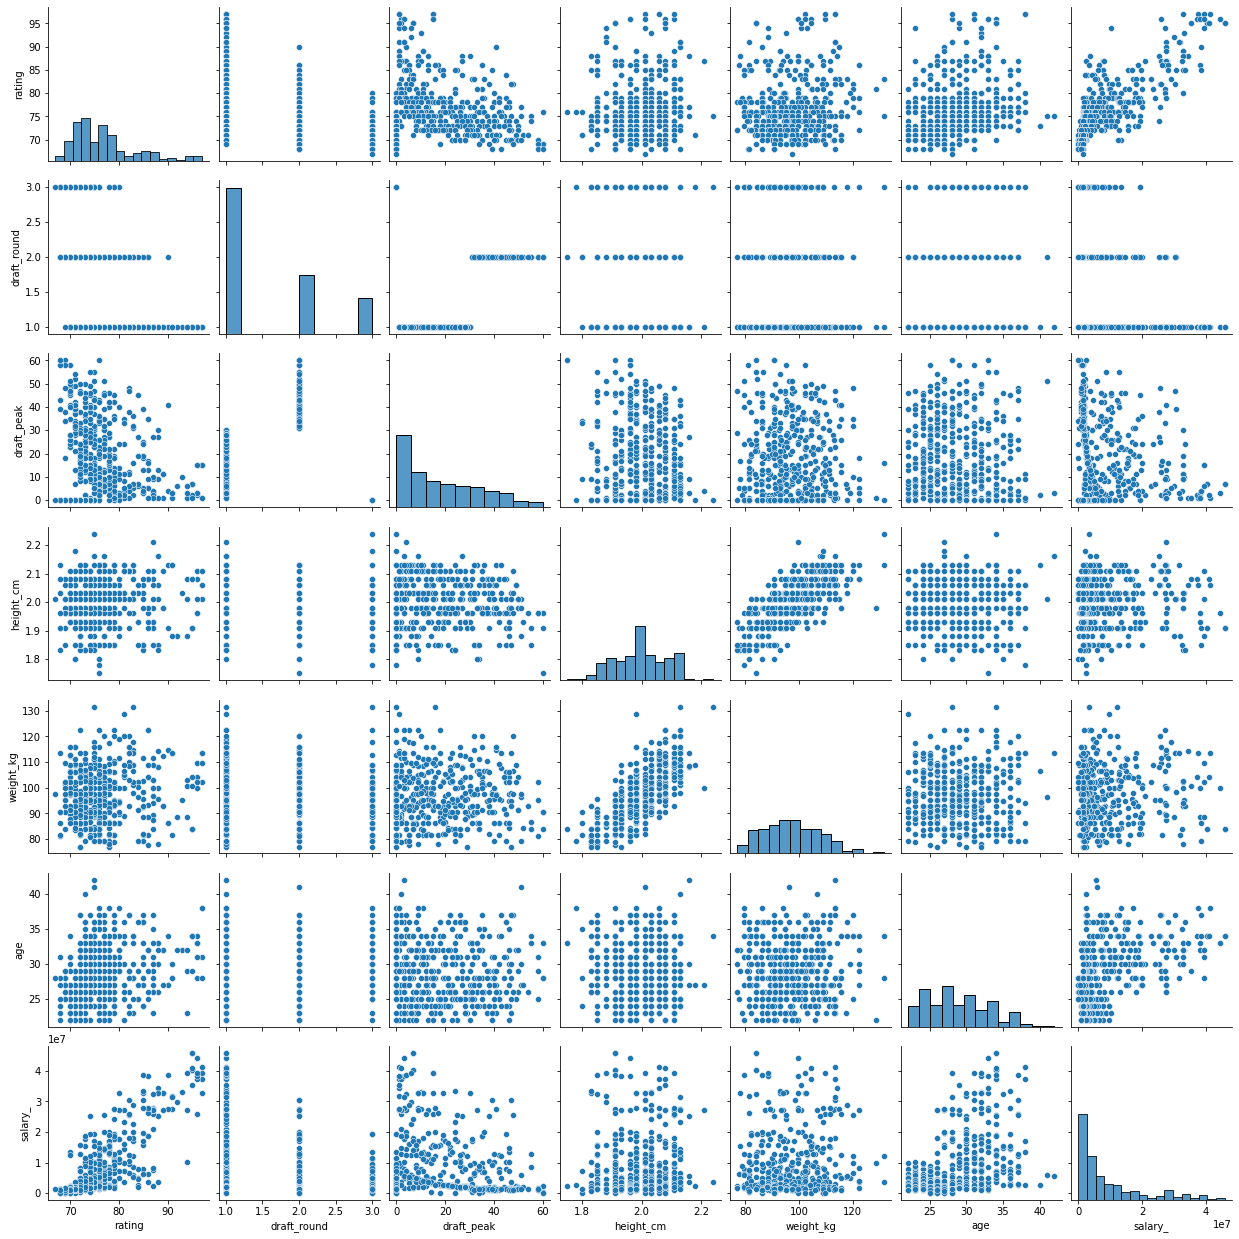

In [ ]:
#analisando graficamente as correlações
plt.figure(figsize=(20,10))
df2=df2.drop(columns=['salary_mean_above'])
sns.pairplot(df2)
plt.show()

In [ ]:
#verifica-se que não existe correlação entre weight e height e salary
#existe correlação entre salary e rating, draft_round, draft_peak e age
# As maiores correlações são entre salary, age e rating
#Graficamente a correlação entre salary e age é a mais perceptiva
#Graficamente e logicamente existe correlação entre weight e height